# Make Bubble Chart for Risk Register
### use pandas to get Excel data

In [3]:
# Library Imports and Python parameter settings
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from IPython.core.display import Image

import pandas as pd
# requires the xlrd module to be installed to read Excel stuff

# Update the matplotlib configuration parameters:
plt.rcParams.update({'font.size': 20,
                     'font.family': 'sans',
                     'font.serif': 'Palatino',
                     'figure.figsize': (10, 8),
                     'axes.grid': True,
                     'grid.color': '#555555'})

In [5]:
# table of risks
xls = pd.ExcelFile('Risk Register.xlsx')
#s1 = xls.sheet_by_index(0)
data = xls.parse(0, index_col=None, na_values=['NA'])
data

,Risk Description,sub-System,Probability (%),Cost to Fix (M$),Time to Fix (m),BNS Impact (% Range),BBH Impact (% Range),Total Severity
0,Gravity Gradient too high,SEI,75,0.30,5,10,90,NaN
1,Thermal Distortion destabilizes ASC,AOS,60,0.50,18,30,50,NaN
2,OMC PZT noise too high,LSC,15,0.10,2,5,5,NaN
3,LSC Aux noise too high,LSC,25,0.03,3,15,15,NaN
4,ASC feedback noise too high,ASC,65,0.03,6,5,90,NaN
5,Beamtube Backscatter,SYS,33,0.15,5,3,65,NaN
6,SRC Mode Healing -> Harming,SYS,50,0.50,6,40,5,NaN
7,BS clipping -> contrast defect,COC,90,0.35,6,33,3,NaN
8,ETM Charge fluctuations,SUS,50,0.20,4,15,40,NaN
9,Parametric Instabilities,LSC,70,0.20,4,40,5,NaN


In [6]:
P = data["Probability (%)"]
C = data["Cost to Fix (M$)"]
bbh = data["BBH Impact (% Range)"]
bns = data["BNS Impact (% Range)"]
dur = data["Time to Fix (m)"]

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/backends/backend_pdf.py:2264: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  different = bool(ours != theirs)


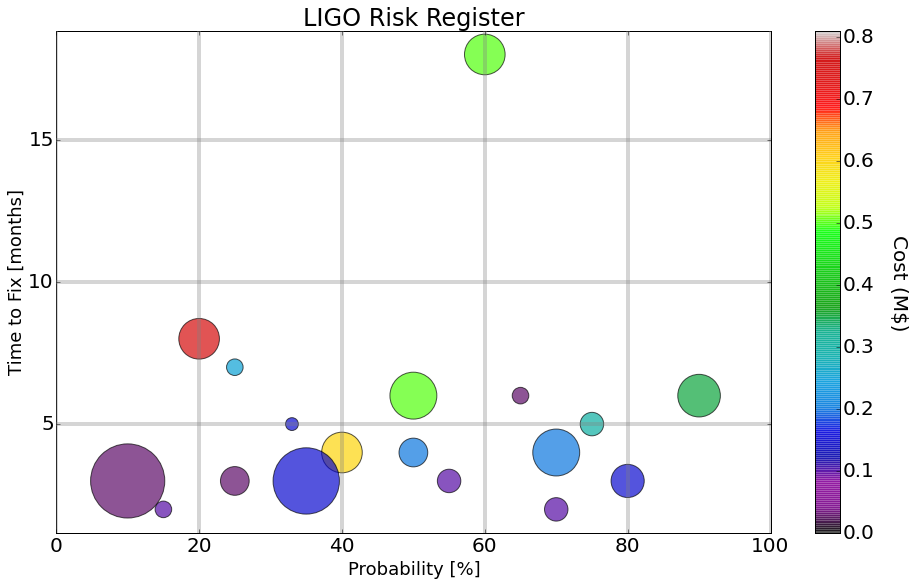

In [7]:
fig = plt.figure(figsize=(16, 9))
sct = plt.scatter(P, dur, c=C, s = 55*bns, alpha = 0.666,
                  vmin=0, vmax=.81, cmap=plt.get_cmap('nipy_spectral'))

plt.xlabel('Probability [%]', fontsize=18)
plt.ylabel('Time to Fix [months]', fontsize=18)

plt.title("LIGO Risk Register");
plt.grid(b=True, which="major", color='gray', alpha=0.33, linestyle='-' , lw=4)
plt.grid(b=True, which="minor", color='gray', alpha=0.22, linestyle='--', lw=1)
plt.axis('tight')
plt.xlim((0, 100))
#plt.ylim((1e-3, 1))

cbar = fig.colorbar(sct)
#cbar.ax.set_yticklabels(['0','1','2','>3'])
cbar.ax.get_yaxis().labelpad = 35
cbar.set_label('Cost (M$)', rotation=270)

#leg = plt.legend(loc='best', fancybox=True, fontsize=14)
#leg.get_frame().set_alpha(0.5)

plt.savefig("Risk.pdf", bbox_inches='tight')

plt.show()

In [16]:
dir(data[0].channel)

## Some references
* http://wiki.scipy.org/NumPy_for_Matlab_Users
* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow

In [10]:
# make Latex source for putting this table into a document
print data.to_latex()

\begin{tabular}{lllrrrrrr}
\toprule
{} &                     Risk Description & sub-System &  Probability (\%) &  Cost to Fix (M\$) &  Time to Fix (m) &  BNS Impact (\% Range) &  BBH Impact (\% Range) &  Total Severity \\
\midrule
0  &            Gravity Gradient too high &        SEI &               75 &              0.30 &                5 &                    10 &                    90 &             NaN \\
1  &  Thermal Distortion destabilizes ASC &        AOS &               60 &              0.50 &               18 &                    30 &                    50 &             NaN \\
2  &               OMC PZT noise too high &        LSC &               15 &              0.10 &                2 &                     5 &                     5 &             NaN \\
3  &               LSC Aux noise too high &        LSC &               25 &              0.03 &                3 &                    15 &                    15 &             NaN \\
4  &          ASC feedback noise too high

In [19]:
x = data["Probability (%)"]
x

0     75
1     60
2     15
3     25
4     65
5     33
6     50
7     90
8     50
9     70
10    25
11    20
12    55
13    70
14    40
15    80
16    35
17    10
Name: Probability (%), dtype: int64

In [28]:
x[1]

60

In [59]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

[u'/Library/Fonts/Trebuchet MS Italic.ttf',
 u'/Library/Fonts/MshtakanRegular.ttf',
 u'/Library/Fonts/Osaka.ttf',
 u'/Library/Fonts/Microsoft/Gill Sans MT Italic.ttf',
 u'/Library/Fonts/Times New Roman.ttf',
 u'/Library/Fonts/\u5137\u5b8b Pro.ttf',
 u'/Library/Fonts/\u30d2\u30e9\u30ad\u3099\u30ce\u4e38\u30b3\u3099 ProN W4.otf',
 u'/Library/Fonts/NISC18030.ttf',
 u'/Library/Fonts/AppleMyungjo.ttf',
 u'/Library/Fonts/Latin Modern/lmsans10-bold.otf',
 u'/Library/Fonts/Latin Modern/lmsans12-regular.otf',
 u'/Library/Fonts/STIXSizThreeSymBol.otf',
 u'/Library/Fonts/AlBayan.ttf',
 u'/Library/Fonts/Microsoft/Candara Bold.ttf',
 u'/System/Library/Fonts/\u30d2\u30e9\u30ad\u3099\u30ce\u89d2\u30b3\u3099 ProN W6.otf',
 u'/Library/Fonts/Microsoft/Tw Cen MT.ttf',
 u'/Library/Fonts/Latin Modern/lmromanslant12-regular.otf',
 u'/Library/Fonts/TeX Gyre/texgyreadventor-regular.otf',
 u'/Library/Fonts/Microsoft/Corbel Bold.ttf',
 u'/Library/Fonts/\u30d2\u30e9\u30ad\u3099\u30ce\u89d2\u30b3\u3099 Pro W6.otf